In [22]:
from lstm import LSTMModel
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import torch
import os
from compute_results import plot_roc_curve, get_overall_metrics

In [23]:
RANDOM_SEED = 33
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Importing preprocessed data

In [24]:
PATH_TRAIN_AXAM_CSV = '../../data/train_AxAm_preprocessed.csv'
PATH_TRAIN_AMAM_CSV = '../../data/train_AmAm_preprocessed.csv'
PATH_VAL_CSV = '../../data/val_preprocessed.csv'
PATH_TEST_CSV = '../../data/test_preprocessed.csv'

y_train_AxAm = pd.read_csv(PATH_TRAIN_AXAM_CSV, usecols=['label'])
y_train_AmAm = pd.read_csv(PATH_TRAIN_AMAM_CSV, usecols=['label'])
y_val = pd.read_csv(PATH_VAL_CSV, usecols=['label'])
y_test = pd.read_csv(PATH_TEST_CSV, usecols=['label'])

KeyboardInterrupt: 

In [ ]:
PATH_TRAIN_AXAM_NPY = '../../data/train_AxAm_charlevel_features.npy'
PATH_TRAIN_AMAM_NPY = '../../data/train_AmAm_charlevel_features.npy'
PATH_VAL_NPY = '../../data/val_charlevel_features.npy'
PATH_TEST_NPY = '../../data/test_charlevel_features.npy'

cl_features_train_AxAm = np.load(PATH_TRAIN_AXAM_NPY)
cl_features_train_AmAm = np.load(PATH_TRAIN_AMAM_NPY)
cl_features_val = np.load(PATH_VAL_NPY)
cl_features_test = np.load(PATH_TEST_NPY)

In [ ]:
cl_features_train_AxAm = torch.tensor(cl_features_train_AxAm, dtype=torch.int32)
cl_features_train_AmAm = torch.tensor(cl_features_train_AmAm, dtype=torch.int32)
cl_features_val = torch.tensor(cl_features_val, dtype=torch.int32)
cl_features_test = torch.tensor(cl_features_test, dtype=torch.int32)

In [ ]:
y_train_AxAm = torch.FloatTensor(y_train_AxAm.to_numpy().squeeze())
y_val = torch.FloatTensor(y_val.to_numpy().squeeze())

# LSTM Baseline

In [ ]:
MAX_FEATURES = cl_features_test.shape[1]
EMBEDDING_DIM = 128
HIDDEN_DIM = 64
DROPOUT_RATE = 0.3

LEARNING_RATE = 4e-4
WEIGHT_DECAY = 3e-5
NUM_EPOCHS = 25
BATCH_SIZE = 128
PATIENCE = 6
DELTA = 0.001

In [ ]:
# TRAINED ON GOOGLE COLAB USING GPU

# model_lstm_AxAm = LSTMModel(max_features=MAX_FEATURES,
#                             embedding_dim=EMBEDDING_DIM,
#                             hidden_dim=HIDDEN_DIM,
#                             dropout_rate=DROPOUT_RATE)
# model_lstm_AxAm.compile(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
# model_lstm_AxAm, train_avg_losses_AxAm, val_avg_losses_AxAm = model_lstm_AxAm.fit(
#                                                 X_train=cl_features_train_AxAm,
#                                                 y_train=y_train_AxAm,
#                                                 num_epochs= NUM_EPOCHS,
#                                                 batch_size=BATCH_SIZE,
#                                                 X_val=cl_features_val,
#                                                 y_val=y_val,
#                                                 patience=PATIENCE,
#                                                 delta=DELTA,
#                                             )

In [ ]:
model_lstm_AxAm = LSTMModel(max_features=MAX_FEATURES, embedding_dim=EMBEDDING_DIM, hidden_dim=HIDDEN_DIM, dropout_rate=DROPOUT_RATE)
model_lstm_AxAm.load_state_dict(torch.load('../../experiments/model_lstm_AxAm.pt'))
model_lstm_AxAm.eval()

LSTMModel(
  (embedding_layer): Embedding(256, 128)
  (lstm_layer): LSTM(128, 64, batch_first=True)
  (dropout_layer): Dropout(p=0.3, inplace=False)
  (linear_layer): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# TRAINED ON GOOGLE COLAB USING GPU

# model_lstm_AmAm = LSTMModel(max_features=MAX_FEATURES,
#                             embedding_dim=EMBEDDING_DIM,
#                             hidden_dim=HIDDEN_DIM,
#                             dropout_rate=DROPOUT_RATE)
# model_lstm_AmAm.compile(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
# model_lstm_AmAm = model_lstm_AmAm.to(device)
# model_lstm_AmAm, train_avg_losses_AmAm, val_avg_losses_AmAm = model_lstm_AmAm.fit(
#                                                 X_train=cl_features_train_AmAm,
#                                                 y_train=y_train_AmAm,
#                                                 num_epochs= NUM_EPOCHS,
#                                                 batch_size=BATCH_SIZE,
#                                                 X_val=cl_features_val,
#                                                 y_val=y_val,
#                                                 patience=PATIENCE,
#                                                 delta=DELTA,
#                                             )

In [ ]:
model_lstm_AmAm = LSTMModel(max_features=MAX_FEATURES, embedding_dim=EMBEDDING_DIM, hidden_dim=HIDDEN_DIM, dropout_rate=DROPOUT_RATE)
model_lstm_AmAm.load_state_dict(torch.load('../../experiments/model_lstm_AmAm.pt'))
model_lstm_AmAm.eval()

LSTMModel(
  (embedding_layer): Embedding(256, 128)
  (lstm_layer): LSTM(128, 64, batch_first=True)
  (dropout_layer): Dropout(p=0.3, inplace=False)
  (linear_layer): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

##  Results

## AxAm trained

### Val

100%|██████████| 1016/1016 [00:53<00:00, 18.92it/s]


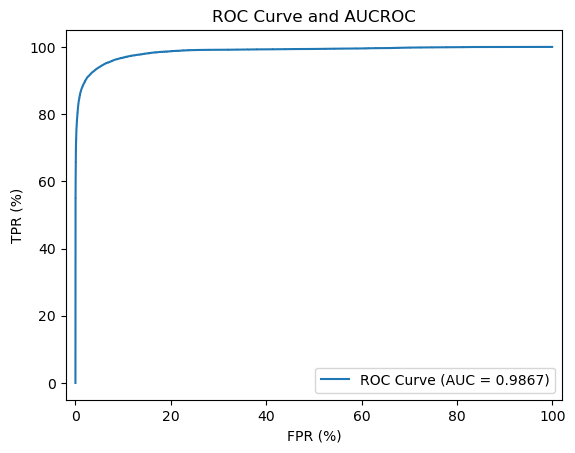

In [ ]:
preds_val_AxAm = model_lstm_AxAm.batch_inference(cl_features_val, BATCH_SIZE)
plot_roc_curve(y_val, preds_val_AxAm)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, preds_val_AxAm)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
BEST_VALIDATION_THRESHOLD_AXAM = df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('fpr').iloc[0]['thresholds']

In [ ]:
get_overall_metrics(y_val, preds_val_AxAm > BEST_VALIDATION_THRESHOLD_AXAM)

{'acc': 0.9507461538461538,
 'tpr': 0.935,
 'fpr': 0.04453,
 'precision': 0.8629972617912193,
 'f1-score': 0.897556917267971}

### Test

100%|██████████| 79/79 [00:07<00:00, 10.15it/s]


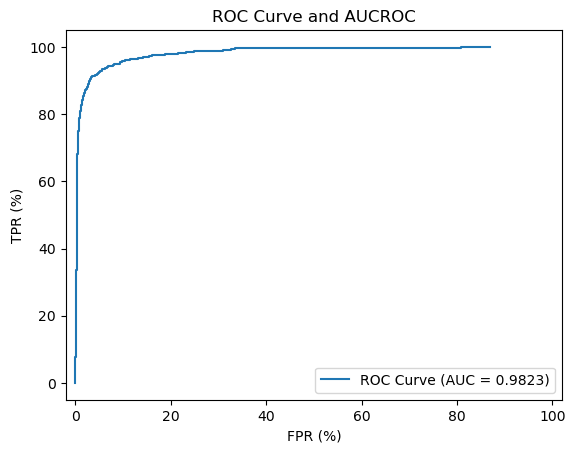

In [ ]:
preds_test_AxAm = model_lstm_AxAm.batch_inference(cl_features_test, BATCH_SIZE)
plot_roc_curve(y_test, preds_test_AxAm)

In [ ]:
get_overall_metrics(y_test, preds_test_AxAm > BEST_VALIDATION_THRESHOLD_AXAM)

NameError: name 'BEST_VALIDATION_THRESHOLD_AXAM' is not defined

In [ ]:
# best_possible_test_threshold
fpr, tpr, thresholds = roc_curve(y_test, preds_test_AxAm)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
best_possible_test_threshold_AxAm = df_val_roc.sort_values('youden-index', ascending=False).query('fpr < 0.01').iloc[0]['thresholds']

In [ ]:
get_overall_metrics(y_test, preds_test_AxAm > best_possible_test_threshold_AxAm)

{'acc': 0.9716,
 'tpr': 0.805,
 'fpr': 0.009888888888888888,
 'precision': 0.9004474272930649,
 'f1-score': 0.8500527983104541}

## AmAm trained

### Val

100%|██████████| 1016/1016 [00:50<00:00, 19.92it/s]


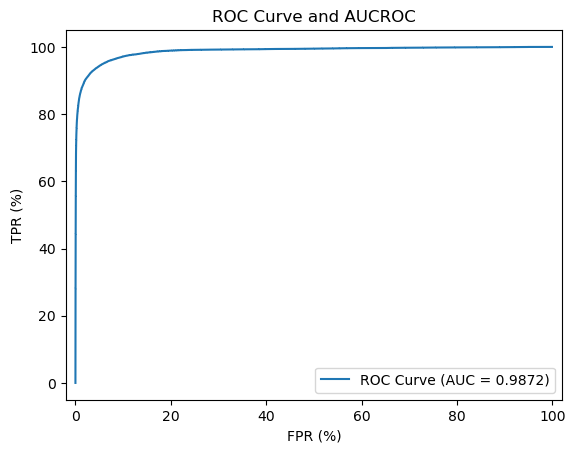

In [ ]:
preds_val_AmAm = model_lstm_AmAm.batch_inference(cl_features_val, BATCH_SIZE)
plot_roc_curve(y_val, preds_val_AmAm)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, preds_val_AmAm)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
BEST_VALIDATION_THRESHOLD_AMAM = df_val_roc.sort_values('youden-index', ascending=False).iloc[0]['thresholds']

In [ ]:
get_overall_metrics(y_val, preds_val_AmAm > BEST_VALIDATION_THRESHOLD_AMAM)

{'acc': 0.9522923076923077,
 'tpr': 0.9364666666666667,
 'fpr': 0.04296,
 'precision': 0.8673664711330658,
 'f1-score': 0.9005930437570123}

### Test

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████| 79/79 [00:07<00:00,  9.99it/s]


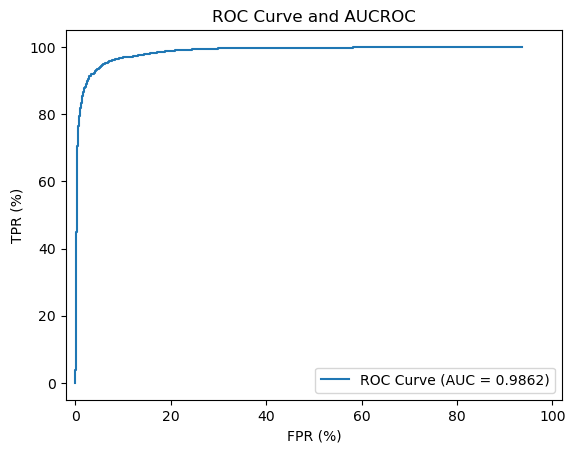

In [ ]:
preds_test_AmAm = model_lstm_AmAm.batch_inference(cl_features_test, BATCH_SIZE)
plot_roc_curve(y_test, preds_test_AmAm)

In [ ]:
get_overall_metrics(y_test, preds_test_AmAm > BEST_VALIDATION_THRESHOLD_AMAM)

{'acc': 0.9446,
 'tpr': 0.928,
 'fpr': 0.05355555555555556,
 'precision': 0.6581560283687943,
 'f1-score': 0.7701244813278008}

In [ ]:
# best_possible_test_threshold
fpr, tpr, thresholds = roc_curve(y_test, preds_test_AmAm)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
best_possible_test_threshold_AmAm = df_val_roc.sort_values('youden-index', ascending=False).query('fpr < 0.01').iloc[0]['thresholds']

In [ ]:
get_overall_metrics(y_test, preds_test_AmAm > best_possible_test_threshold_AmAm)

{'acc': 0.9728,
 'tpr': 0.814,
 'fpr': 0.009555555555555555,
 'precision': 0.9044444444444445,
 'f1-score': 0.8568421052631578}

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, preds_test_AmAm, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [ ]:
get_overall_metrics(y_test, preds_test_AmAm > eer_threshold)

{'acc': 0.9356,
 'tpr': 0.936,
 'fpr': 0.06444444444444444,
 'precision': 0.6174142480211082,
 'f1-score': 0.7440381558028618}